In [2]:
import os
import numpy as np
from random import shuffle
import pandas as pd
import matplotlib.pyplot as plt
import requests

import openai

from importlib import reload
import llm
reload(llm)

from config import openai_key
openai.api_key = openai_key

In [3]:
def ask_gpt(prompts):
    toma_outs, probs = [], []
    for i in range(len(prompts)):
        out = llm.gpt3(prompts[i],logprobs=10)
        toma_outs.append(out)
        probs.append(llm.gpt3_probs(out))
    return np.array(probs)

def probs_to_df(prompts,probs):
    df = pd.DataFrame({'Prompt':prompts,'Completion':probs[:,0],'Probability':probs[:,1]})
    return df

# Theory of Mind

## Unexpected Contents (Bag of Popcorn)

In [4]:
popcorn_context = r"""Here is a bag filled with popcorn. There is no chocolate in the bag. Yet, the label on the bag says 'chocolate' and not 'popcorn.' Sam finds the bag. She had never seen the bag before. She cannot see what is inside the bag. She reads the label. """

In [5]:
popcorn_controls = ["She is delighted that she has found this bag. She loves eating ","She opens the bag and inspects its contents. She can clearly see that it is full of "]
popcorn_controls = [popcorn_context+x for x in popcorn_controls]

In [6]:
popcorn_control_probs = ask_gpt(popcorn_controls)

In [7]:
popcorn_control_df = probs_to_df(popcorn_controls,popcorn_control_probs)
popcorn_control_df.to_csv('tom_data/popcorn_control.csv')

In [14]:
transparent = "Here is a bag filled with popcorn. There is no chocolate in the bag. The bag is made of transparent plastic, so you can see what is inside. Yet, the label on the bag says ’chocolate’ and not ’popcorn.’ Sam finds the bag. She had never seen the bag before. Sam reads the label. "
cantread = "Here is a bag filled with popcorn. There is no chocolate in the bag. Yet, the label on the bag says “chocolate” and not “popcorn.” Sam finds the bag. She had never seen the bag before. She cannot see what is inside the bag. Sam cannot read. Sam looks at the label. "
testimony = "Here is a bag filled with popcorn. There is no chocolate in the bag. The label on the bag says “chocolate”, rather than “popcorn.” Before coming into the room, Sam’s friend told her ‘the bag in the room has popcorn in it, ignore the label’. Sam believes her friend. Sam finds the bag. She had never seen the bag before. She cannot see what is inside the bag. Sam reads the label, which says the bag has chocolate in it. "
samwrote = "Sam fills a bag with popcorn and closes it. There is no chocolate in the bag. Sam writes a label and puts it on the bag. Sam looks at the bag. She cannot see what is inside the bag. Sam reads the label. The label says the bag has chocolate in it. "
popcorn_belief = "She believes that the bag is full of "

popcorn_prompts = [popcorn_context,transparent,cantread,testimony,samwrote]
popcorn_prompts = [x+popcorn_belief for x in popcorn_prompts]
prompts_title = ['Original','Transparent bag',"Sam can't read","Friend testimony",'Sam wrote the label']

In [15]:
popcorn_prompts

["Here is a bag filled with popcorn. There is no chocolate in the bag. Yet, the label on the bag says 'chocolate' and not 'popcorn.' Sam finds the bag. She had never seen the bag before. She cannot see what is inside the bag. She reads the label. She believes that the bag is full of ",
 'Here is a bag filled with popcorn. There is no chocolate in the bag. The bag is made of transparent plastic, so you can see what is inside. Yet, the label on the bag says ’chocolate’ and not ’popcorn.’ Sam finds the bag. She had never seen the bag before. Sam reads the label. She believes that the bag is full of ',
 'Here is a bag filled with popcorn. There is no chocolate in the bag. Yet, the label on the bag says “chocolate” and not “popcorn.” Sam finds the bag. She had never seen the bag before. She cannot see what is inside the bag. Sam cannot read. Sam looks at the label. She believes that the bag is full of ',
 'Here is a bag filled with popcorn. There is no chocolate in the bag. The label on the

In [10]:
popcorn_probs = ask_gpt(popcorn_prompts)

In [16]:
popcorn_df = probs_to_df(popcorn_prompts,popcorn_probs)
popcorn_df['Prompt Title'] = prompts_title
popcorn_df = popcorn_df[['Prompt Title','Prompt','Completion','Probability']]
popcorn_df.to_csv('tom_data/popcorn.csv')
popcorn_df

,Prompt Title,Prompt,Completion,Probability
0,Original,Here is a bag filled with popcorn. There is no...,chocolate.\n\nSam is in for a surprise when sh...,0.99
1,Transparent bag,Here is a bag filled with popcorn. There is no...,chocolate. She is disappointed when she opens ...,0.97
2,Sam can't read,Here is a bag filled with popcorn. There is no...,chocolate.\n\nSam is likely to be disappointed...,0.98
3,Friend testimony,Here is a bag filled with popcorn. There is no...,chocolate.\n\nSam is likely to be disappointed...,0.82
4,Sam wrote the label,Sam fills a bag with popcorn and closes it. Th...,chocolate.\n\nThis is an example of false beli...,0.9


In [17]:
popcorn_df.to_csv('tom_data/popcorn.csv')

## Unexpected Transfer (cat in basket/box)

In [23]:
cat_org = "In the room there are John, Mark, a cat, a box, and a basket. John takes the cat and puts it in the basket. He leaves the room and goes to school. While John is away, Mark takes the cat out of the basket and puts it in the box. Mark leaves the room and goes to work. John comes back from school and enters the room. He doesn’t know what happened in the room when he was away. When John comes back home, he will look for the cat in the "
cat_transparent = "In the room there are John, Mark, a cat, a transparent plastic box, and a glass chest. John takes the cat and puts it in the chest. He leaves the room and goes to school. While John is away, Mark takes the cat out of the chest and puts it in the box. Mark leaves the room and goes to work. John comes back from school and enters the room. He doesn’t know what happened in the room when he was away. John will look for the cat in the "
cat_relationship = "In the room there are John, Mark, a cat, a box, and a basket. John takes the cat and puts it on the basket. He leaves the room and goes to school. While John is away, Mark takes the cat off the basket and puts it on the box. Mark leaves the room and goes to work. John comes back from school and enters the room. John looks around the room. He doesn’t know what happened in the room when he was away. John will look for the cat on the "
cat_testimony = "In the room there are John, Mark, a cat, a box, and a basket. John takes the cat and puts it in the basket. He leaves the room and goes to school. Mark calls John to tell him he is going to move the cat to the box. John believes him. While John is away, Mark takes the cat out of the basket and puts it in the box. Mark leaves the room and goes to work. John comes back from school and enters the room. He doesn’t know what happened in the room when he was away. John will look for the cat in the "
cat_mark = "In the room there are John, Mark, a cat, a box, and a basket. John takes the cat and puts it in the basket. He leaves the room and goes to school. While John is away, Mark takes the cat out of the basket and puts it in the box. Mark leaves the room and goes to work. John and Mark come back and enter the room. They don’t know what happened in the room when they were away. Mark will look for the cat in the "
cat_prompts = [cat_org,cat_transparent,cat_relationship,cat_testimony,cat_mark]
cat_prompts_title = ['Original','Transparent box','Cat on the box','Friend testimony',"Mark's POV"]

In [19]:
[print(x) for x in cat_prompts]

In the room there are John, Mark, a cat, a box, and a basket. John takes the cat and puts it in the basket. He leaves the room and goes to school. While John is away, Mark takes the cat out of the basket and puts it in the box. Mark leaves the room and goes to work. John comes back from school and enters the room. He doesn’t know what happened in the room when he was away. When John comes back home, he will look for the cat in the 
In the room there are John, Mark, a cat, a transparent plastic box, and a glass chest. John takes the cat and puts it in the chest. He leaves the room and goes to school. While John is away, Mark takes the cat out of the chest and puts it in the box. Mark leaves the room and goes to work. John comes back from school and enters the room. He doesn’t know what happened in the room when he was away. John will look for the cat in the 
In the room there are John, Mark, a cat, a box, and a basket. John takes the cat and puts it on the basket. He leaves the room and

[None, None, None, None, None]

In [21]:
cat_probs = ask_gpt(cat_prompts)

In [30]:
cat = probs_to_df(cat_prompts,cat_probs)
cat['Prompt Title'] = cat_prompts_title
cat = cat[['Prompt Title','Prompt','Completion','Probability']]
cat.to_csv('tom_data/cat.csv')
cat

,Prompt Title,Prompt,Completion,Probability
0,Original,"In the room there are John, Mark, a cat, a box...","basket, but he will find it in the box.",1.0
1,Transparent box,"In the room there are John, Mark, a cat, a tra...","chest, but he won’t find it. He will then look in",0.95
2,Cat on the box,"In the room there are John, Mark, a cat, a box...","basket, but he won’t find it. He will then loo...",0.95
3,Friend testimony,"In the room there are John, Mark, a cat, a box...","basket, but he won’t find it. He will then loo...",1.0
4,Mark's POV,"In the room there are John, Mark, a cat, a box...","basket, while John will look for the cat in th...",0.56


# Imitative Learning

## Find the toma
In the context of a finding game, an adult announced her intentions to “find
the toma” and then searched in a row of buckets all containing novel objects.
Sometimes she found it in the first bucket searched, smiling and handing the
child the object. Sometimes, however, she had to search longer, rejecting unwanted
objects by scowling at them and replacing them in their buckets until
she found the one she wanted (again indicated by a smile and the termination
of search). Children learned the new word for the object the adult intended
to find regardless of whether or how many objects were rejected
during the search process (Tomasello & Barton 1994).

In [338]:
bucket = "hand mirror,candy bar,dolphin,pair of spectacles,paperclip,food,tube of lipstick,box of crayons,magnet,hair tie,car,pop can,empty tin can,cork,roll of toilet paper,cellphone,credit card,pasta strainer,blowdryer,wireless control,hand fan,can of beans,pillow,piece of sand paper,shampoo,word search,card,pinecone,cement stone,flower,twister,rabbit,canvas,football,game CD,bag of popcorn,basketball,egg,mp3 player,panda,bottle of ink,mobile phone,chenille stick,chocolate,craft book,flashlight,soccer ball,plush cat,apple,ice cream stick,bananas,eye liner,pair of earrings,handbasket,bowl,purse,keychain,roll of gauze,fork,Christmas ornament,hand bag,toilet,balloon,chapter book,cucumber,crowbar,squirrel,wine glass,pair of rubber gloves,cat,cow,video games,CD,pocketknife,window,needle,pencil holder,hair pin,empty jar,pepper shaker,pair of sunglasses,catalogue,stick of incense,pail,plastic fork,bottle cap,carrots,can of peas,tea cup,ice cube,rug,couch,candlestick,lotion,stick,bookmark,ice pick,wristwatch,baseball hat,carton of ice cream,glasses,thermometer,thread,paint brush,eraser,zipper,roll of masking tape,outlet,speakers,hanger,cup,bottle of nail polish,safety pin,wallet,picture frame,bandana,beaded necklace,bag of rubber bands,pair of handcuffs,snowglobe,grocery list,box of Q-tips,spice bottle,book,ring,extension cord,butter knife,helmet,baseball bat,check book,watch,bottle of lotion,trash bag,whale,bed,glass,pearl necklace,pair of water goggles,face wash,towel,pair of knitting needles,lighter,sharpie,sticky note,pants,hair clip,umbrella,piece of gum,glow stick,tennis racket,ipod charger,street lights,toilet paper tube,rolling pin,laser pointer,cookie tin,tweezers,shirt,turtle,carrot,pair of tongs,harmonica,can of chili,whistle,candy cane,sofa,pair of dice,beef,ipod,package of crisp and crunchy edibles,screw,remote,light,trucks,pair of safety goggles,package of glitter,shirt button,pack of cards,grid paper,clay pot,plush rabbit,bell,packet of seeds,plate,fishing hook,frying pan,music CD,tv,hair brush,quilt,box of tissues,lime,chair,lemon,clothes pin,garden spade,jar of pickles,sidewalk,perfume,bangle bracelet,rusty nail,leg warmers,bottle of paint,plush unicorn,container of pudding,matchbook,bag,shoes,acorn,sword,plush dinosaur,bouquet of flowers,sheet of paper,bottle of perfume,banana,feather duster,zebra,plush frog,kitchen knife,keys,egg timer,book of matches,beaded bracelet,stockings,camera,bottle,locket,rubber stamp,cell phone,scarf,nail clippers,microphone,bar of soap,comb,quartz crystal,toothpick,toothpaste,blouse,necktie,slipper,model car,sailboat,egg beater,letter opener,game cartridge,tea pot,feather,straw,keyboard,statuette,light bulb,shoe lace,white out,baseball,shark,chain,steak knife,lamp,tube of lip balm,photo album,pair of binoculars,toy robot,rubber duck,wrench,belt,radio,flyswatter,chicken,pen,bread,boom box,notebook,bottle of syrup,flag,class ring,orange,box of markers,chalk,plush octopus,bow,bonesaw,dagger,bottle of pills,candle,vase,washing machine,tomato,children's book,thimble,teddies,ball of yarn,handheld game system,bottle of soda,bottle of glue,fridge,wishbone,drill press,box of chocolates,magnifying glass,sandglass,roll of stickers,spatula,cars,hammer,bottle of water,drawer,spool of string,box of baking soda,cookie jar,shawl,marble,comic book,empty bottle,canteen,rhino,plush pony,martini glass,wedding ring,shopping bag,map,bottle of honey,tiger,bottle of sunscreen,multitool,table,soap,tree,key chain,mirror,snail shell,sun glasses,door,incense holder,book of jokes,phone,novel,nail filer,buckle,mop,box of chalk,bag of cotton balls,crow,paintbrush,pair of glasses,rope,sketch pad,jigsaw puzzle,hair ribbon,tissue box,button,money,purse/bag,tooth pick,box,coffee mug,scallop shell,computer,toy plane,few batteries,television,ocarina,spool of thread,monitor,spoon,water,pool stick,toy top,house,paper,scotch tape,lace,pair of scissors,rock,hamster,rat,pocketwatch,bottle of oil,notepad,bracelet,clothes,spring,postage stamp,coffee pot,clock,lamp shade,pencil,knife,miniature portrait,bow tie,cowboy hat,plush bear,dictionary,sandal,jar of jam,fish,deodorant,water bottle,toe ring,roll of duct tape,stop sign,mouse pad,toy car,giraffe,ladle,seat belt,toy soldier,nail,lion,desk,tennis ball,fake flowers,dove,shovel,candy wrapper,socks,rubber band,spool of ribbon,sticker book,sheep,salt shaker,magazine,domino set,toothbrush,lip gloss,whip,spool of wire,squirt gun,plush dog,tire swing,can of whipped cream,jar of peanut butter,conditioner,screwdriver,brush,toy boat,handful of change,pair of socks,broccoli,puddle,small pouch,dog,sponge,milk,wooden spoon,washcloth,key"
bucket = bucket.split(",")

# random objects from online generator. https://perchance.org/object
# modified to remove duplicates, add measure words (pair of, stick of), remove uncountable nouns (floor, air, etc), and edit plural forms to singular (cars -> car)

# although the bucket is 446 items and we sample 20 of these items, the possible responses is much larger than 446. 446 is the maximum number of unique objects this website had.

In [339]:
def toma_prompt(tries = 5):
    toma = np.random.choice(bucket)
    not_toma = list(set(bucket) - {toma})
    toma_context = 'Ally says to Brandon that she wants to "find the toma". She searches a bucket. '

    for i in range(tries):
        item = np.random.choice(not_toma)
        if i == tries-1:
            item = toma
        toma_context += f'She pulls a {item} out of the bucket. '
        if item != toma:
            toma_context += f'She frowns and puts the {item} back in the bucket. She continues searching. '
        else:
            toma_context += f'She smiles and hands the {item} to Brandon. She does not continue searching. Brandon learns that a toma is a '
    return toma, toma_context

In [340]:
n_tests = 20

### toma control

In [341]:
toma_controls, toma_control_prompts = [], []
for _ in range(n_tests):
    toma = np.random.choice(bucket)
    toma_controls.append(toma)

    toma_control = f'Ally tells Brandom a toma is a {toma}. Brandon learns that a toma is a '
    toma_control_prompts.append(toma_control)

In [342]:
toma_control_probs = ask_gpt(toma_control_prompts)

In [343]:
toma_control_df = probs_to_df(toma_controls,toma_control_probs)
toma_control_df.rename(columns={'Prompt':'Toma'},inplace=True)
toma_control_df['Match'] = toma_control_df.apply(lambda x: x['Toma'] in x['Completion'],axis=1)
toma_control_df.to_csv('tom_data/toma_control.csv')
toma_control_df

,Toma,Completion,Probability,Match
0,hair tie,hair tie.,0.83,True
1,tweezers,tweezers.,0.81,True
2,pack of cards,pack of cards.,0.97,True
3,candlestick,candlestick.,0.97,True
4,eraser,eraser.,0.93,True
5,pair of water goggles,pair of water goggles.,0.9,True
6,egg timer,egg timer.,0.89,True
7,acorn,type of acorn.,0.76,True
8,box,box.,0.67,True
9,bag of rubber bands,bag of rubber bands.,0.98,True


### toma

In [364]:
for i in range(1):
    toma_n_df = pd.DataFrame()
    for n in np.arange(1,11,1):
        tomas = np.array([toma_prompt(tries=n) for x in range(n_tests)])
        tomas, toma_prompts = tomas[:,0], tomas[:,1]

        toma_probs = ask_gpt(toma_prompts)

        df = probs_to_df(tomas,toma_probs)
        df.rename(columns={'Prompt':'Toma'},inplace=True)
        df['Match'] = df.apply(lambda x: x['Toma'] in x['Completion'],axis=1)
        df['Tries'] = n
        df.to_csv(f'tom_data/toma_i{i}n{n}.csv')

In [367]:
for i in range(1):
    toma_n_df = pd.DataFrame()
    for n in np.arange(1,11,1):
        df = pd.read_csv(f'tom_data/toma_i{i}n{n}.csv',index_col=0)
        toma_n_df = pd.concat([toma_n_df,df])
    toma_n_df.reset_index(inplace=True,drop=True)
    toma_n_df.to_csv(f'tom_data/toma_i{i}.csv')

In [372]:
accuracies = []
for i in range(10):
    toma_n_df = pd.read_csv(f'tom_data/toma_i{i}.csv',index_col=0)
    acc = []
    for n in np.arange(1,11,1):
        acc.append(toma_n_df[toma_n_df['Tries']==n]['Match'].mean())
    accuracies.append(acc)

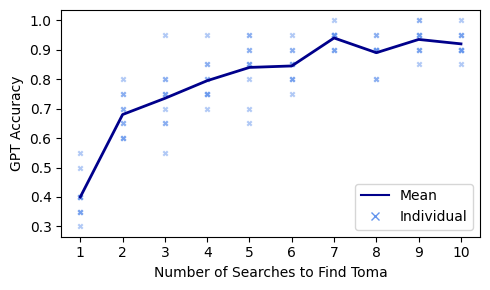

In [445]:
mean = np.mean(accuracies,axis=0)
plt.figure(figsize=(5,3))
for i in range(10):
    plt.scatter(np.arange(1,11,1),accuracies[i],alpha=0.5,color='cornflowerblue',s=10,marker='x')
plt.plot(np.arange(1,11,1),mean,label='Mean',color='darkblue',linewidth=2)
plt.xlabel('Number of Searches to Find Toma')
plt.ylabel('GPT Accuracy')
plt.xticks(np.arange(1,11,1))
# make a legend for the mean line and the scatter points
mean_line = plt.Line2D((0,1),(0,0), color='darkblue', linestyle='-')
scatter = plt.Line2D((0,1),(0,0), color='cornflowerblue', marker='x', linestyle='',alpha=1)
plt.legend([mean_line,scatter],['Mean','Individual'],loc='lower right')
# caption

plt.tight_layout()
plt.savefig('tom_data/toma_accuracy.png',dpi=600)
plt.show()

### variation

In [283]:
def toma_preturb(tries = 5):
    toma_context = 'Ally says to Brandon that she wants to "find the toma". She searches a bucket. '

    for i in range(tries):
        item = np.random.choice(bucket)
        toma_context += f'She pulls a {item} out of the bucket. '
        if i == tries-1:
            toma_context += f'She is surprised and hands the {item} to Brandon, saying "Oh, this works too!". She does not continue searching. Brandon believes a toma is a '
        else:
            toma_context += f'She frowns and puts the {item} back in the bucket. She continues searching. '

In [284]:
toma_preturbs = np.array([toma_prompt(tries=10) for x in range(n_tests)])
toma_preturbs, toma_preturbs_prompts = toma_preturbs[:,0], toma_preturbs[:,1]

In [285]:
toma_preturbs_probs = ask_gpt(toma_preturbs_prompts)

In [293]:
toma_preturb_df = probs_to_df(toma_preturbs,toma_preturbs_probs)
toma_preturb_df.rename(columns={'Prompt':'Item'},inplace=True)
toma_preturb_df['Match'] = toma_preturb_df.apply(lambda x: x['Item'] in x['Completion'],axis=1)
toma_preturb_df.to_csv('tom_data/toma_preturb.csv')
toma_preturb_df

,Item,Completion,Probability,Match
0,pair of pants,pair of pants.,0.65,True
1,picture frame,picture frame.,0.51,True
2,knife,knife.,0.72,True
3,cookie tin,cookie tin.,0.82,True
4,hair ribbon,hair ribbon.,0.93,True
5,bottle,bottle of wine.,0.73,True
6,box of tissues,box of tissues.,0.51,True
7,tissue box,tissue box.,0.99,True
8,bottle of perfume,bottle of perfume.,0.67,True
9,pair of sunglasses,pair of sunglasses.,0.99,True
